Library yang digunakan :

os: Library os (Operating System) menyediakan fungsi-fungsi untuk berinteraksi dengan sistem operasi, seperti mengakses file dan direktori, membuat direktori, dan sebagainya. Dalam kode ini, os digunakan untuk mengakses file dan direktori, serta membuat folder output jika belum ada.

cv2: Library cv2 (OpenCV) adalah library komputer vision yang menyediakan berbagai fungsi untuk memanipulasi dan menganalisis gambar dan video. Dalam kode ini, cv2 digunakan untuk membaca gambar, mengubah gambar menjadi grayscale, menerapkan ekualisasi histogram, membuat invers gambar, dan menyimpan gambar hasil proses.

matplotlib.pyplot: Library matplotlib.pyplot adalah library untuk visualisasi data menggunakan grafik. Dalam kode ini, matplotlib.pyplot digunakan untuk menampilkan gambar secara horizontal dalam plot.

pandas : pustaka Python yang digunakan untuk manipulasi dan analisis data. Pernyataan import pandas as pd mengimport modul pandas dan memberikan alias pd ke modul tersebut. Alias pd digunakan untuk merujuk ke modul pandas saat memanggil fungsi atau atribut yang ada dalam modul tersebut.

In [187]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Memproses gambar pada folder: Bandeng - Fresh
Memproses gambar pada folder: Bandeng - Highly Fresh
Memproses gambar pada folder: Bandeng - Not Fresh


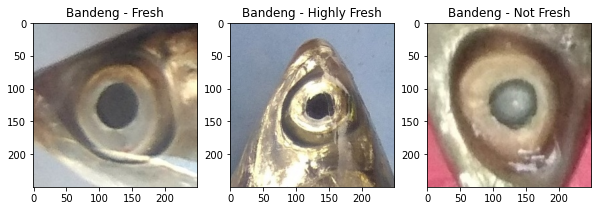

In [188]:
def gambar(folder):
    Baca_gambar = {}
    fig, update = plt.subplots(nrows=1, ncols=len(os.listdir(folder)), figsize=(10, 5))

    for i, label in enumerate(os.listdir(folder)):
        label_path = os.path.join(folder, label)

        if os.path.isdir(label_path):
            print(f"Memproses gambar pada folder: {label}")
            
            for j, filename in enumerate(os.listdir(label_path)):
                if j >= 1: # kalo mau rubah gambarnya ganti nilainya 
                    break  # Hanya mengambil satu gambar per folder
                file_path = os.path.join(label_path, filename)
                img = cv2.imread(file_path)
                
                # Menampilkan gambar secara horizontal
                update[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                update[i].set_title(label)
        else:
            print(f"Label '{label}' tidak dalam direktori")

    plt.show()
    return Baca_gambar

folder_disimpan = r'C:\Users\ASUS\Downloads\TubesPCDVer3\TUBES KELOMPOK 11\CodePCDKelompok11\DatasetBandengOriginal'

Hasil_Gambar = gambar(folder_disimpan)

#### 1. Resize

In [189]:
def resize_images(folder):
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)

        if os.path.isdir(label_path):
            
            for filename in os.listdir(label_path):
                file_path = os.path.join(label_path, filename)
                img = cv2.imread(file_path)
                
                resized_img = cv2.resize(img, (250, 250))
                
                cv2.imwrite(file_path, resized_img)
        else:
            print(f"Label '{label}' tidak dalam direktori")

#### 2. Grayscale

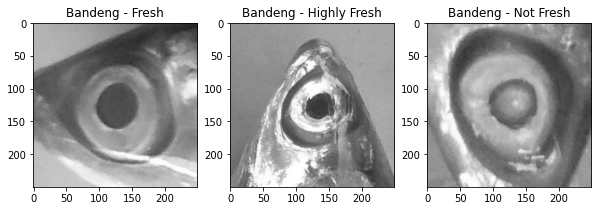

In [202]:
def Grayscale(folder):
    fig, update = plt.subplots(nrows=1, ncols=len(os.listdir(folder)), figsize=(10, 5))

    for i, label in enumerate(os.listdir(folder)):
        label_path = os.path.join(folder, label)

        if os.path.isdir(label_path):
            
            for j, filename in enumerate(os.listdir(label_path)):
                if j >= 1:
                    break
                file_path = os.path.join(label_path, filename)
                img = cv2.imread(file_path)
                
                update[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                update[i].set_title(label)
        else:
            print(f"Label '{label}' tidak dalam direktori")

    plt.show()

folder_disimpan = r'C:\Users\ASUS\Downloads\TubesPCDVer3\TUBES KELOMPOK 11\CodePCDKelompok11\DatasetBandengGrayScale'

Grayscale(folder_disimpan)


#### 3. Cropping

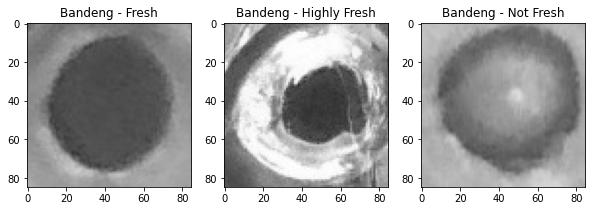

In [197]:
def crop_images(folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)  
    
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        output_label_path = os.path.join(output_folder, label)
        os.makedirs(output_label_path, exist_ok=True) 
        
        if os.path.isdir(label_path):
            
            for filename in os.listdir(label_path):
                file_path = os.path.join(label_path, filename)
                img = cv2.imread(file_path)
                
                cropped_img = img[85:170, 85:170] 
                
                output_file_path = os.path.join(output_label_path, filename)
                cv2.imwrite(output_file_path, cropped_img)
        else:
            print(f"Label '{label}' tidak dalam direktori")

def menampilkan_crop(folder):
    fig, update = plt.subplots(nrows=1, ncols=len(os.listdir(folder)), figsize=(10, 5))

    for i, label in enumerate(os.listdir(folder)):
        label_path = os.path.join(folder, label)

        if os.path.isdir(label_path):
            for j, filename in enumerate(os.listdir(label_path)):
                if j >= 1:
                    break
                file_path = os.path.join(label_path, filename)
                img = cv2.imread(file_path)
                
                update[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                update[i].set_title(label)
        else:
            print(f"Label '{label}' tidak dalam direktori")

    plt.show()

folder_grayscale = r'C:\Users\ASUS\Downloads\TubesPCDVer3\TUBES KELOMPOK 11\CodePCDKelompok11\DatasetBandengGrayScale'

folder_cropping = r'C:\Users\ASUS\Downloads\TubesPCDVer3\TUBES KELOMPOK 11\CodePCDKelompok11\DatasetBandengCropping'

crop_images(folder_grayscale, folder_cropping)

menampilkan_crop(folder_cropping)


#### 4. Median Filtering 

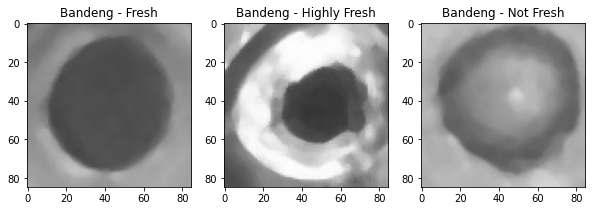

In [198]:
def median_filter_images(folder, output_folder):
    os.makedirs(output_folder, exist_ok=True) 
    
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        output_label_path = os.path.join(output_folder, label)
        os.makedirs(output_label_path, exist_ok=True)  
        
        if os.path.isdir(label_path):
            
            for filename in os.listdir(label_path):
                file_path = os.path.join(label_path, filename)
                img = cv2.imread(file_path)
                
                filtered_img = cv2.medianBlur(img, 5) 
                
                output_file_path = os.path.join(output_label_path, filename)
                cv2.imwrite(output_file_path, filtered_img)
        else:
            print(f"Label '{label}' tidak dalam direktori")

def menampilkan_filtering(folder):
    fig, update = plt.subplots(nrows=1, ncols=len(os.listdir(folder)), figsize=(10, 5))

    for i, label in enumerate(os.listdir(folder)):
        label_path = os.path.join(folder, label)

        if os.path.isdir(label_path):
            
            for j, filename in enumerate(os.listdir(label_path)):
                if j >= 1:
                    break
                file_path = os.path.join(label_path, filename)
                img = cv2.imread(file_path)
             
                update[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                update[i].set_title(label)
        else:
            print(f"Label '{label}' tidak dalam direktori")

    plt.show()

folder_cropping = r'C:\Users\ASUS\Downloads\TubesPCDVer3\TUBES KELOMPOK 11\CodePCDKelompok11\DatasetBandengCropping'

folder_median_filtering = r'C:\Users\ASUS\Downloads\TubesPCDVer3\TUBES KELOMPOK 11\CodePCDKelompok11\DatasetBandengMedianFiltering'

median_filter_images(folder_cropping, folder_median_filtering)

menampilkan_filtering(folder_median_filtering)

#### 5. Kontras

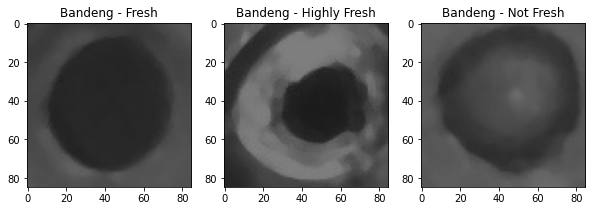

In [199]:
def contrast(folder, output_folder, alpha, beta):
    os.makedirs(output_folder, exist_ok=True)  
    
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        output_label_path = os.path.join(output_folder, label)
        os.makedirs(output_label_path, exist_ok=True)  
        
        if os.path.isdir(label_path):
            
            for filename in os.listdir(label_path):
                file_path = os.path.join(label_path, filename)
                img = cv2.imread(file_path)
                
                enhanced_img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
                
                output_file_path = os.path.join(output_label_path, filename)
                cv2.imwrite(output_file_path, enhanced_img)
        else:
            print(f"Label '{label}' tidak dalam direktori")

def menampilkan_contrast(folder):
    fig, update = plt.subplots(nrows=1, ncols=len(os.listdir(folder)), figsize=(10, 5))

    for i, label in enumerate(os.listdir(folder)):
        label_path = os.path.join(folder, label)

        if os.path.isdir(label_path):
            
            for j, filename in enumerate(os.listdir(label_path)):
                if j >= 1:
                    break
                file_path = os.path.join(label_path, filename)
                img = cv2.imread(file_path)
                
                update[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                update[i].set_title(label)
        else:
            print(f"Label '{label}' tidak dalam direktori")

    plt.show()

folder_median_filtering = r'C:\Users\ASUS\Downloads\TubesPCDVer3\TUBES KELOMPOK 11\CodePCDKelompok11\DatasetBandengMedianFiltering'

folder_contras = r'C:\Users\ASUS\Downloads\TubesPCDVer3\TUBES KELOMPOK 11\CodePCDKelompok11\DatasetBandengContras'

alpha = 0.5  
beta = 0    

contrast(folder_median_filtering, folder_contras, alpha, beta)

menampilkan_contrast(folder_contras)


#### 6. Sharpening

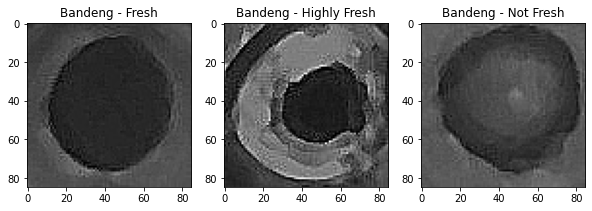

In [200]:
def sharpen_images(folder, output_folder):
    os.makedirs(output_folder, exist_ok=True) 
    
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        output_label_path = os.path.join(output_folder, label)
        os.makedirs(output_label_path, exist_ok=True)  
        
        if os.path.isdir(label_path):
            
            for filename in os.listdir(label_path):
                file_path = os.path.join(label_path, filename)
                img = cv2.imread(file_path)
                
                kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
                
                sharpened_img = cv2.filter2D(img, -1, kernel)
            
                output_file_path = os.path.join(output_label_path, filename)
                cv2.imwrite(output_file_path, sharpened_img)
        else:
            print(f"Label '{label}' tidak dalam direktori")

def menampilkan_sharpening(folder):
    fig, update = plt.subplots(nrows=1, ncols=len(os.listdir(folder)), figsize=(10, 5))

    for i, label in enumerate(os.listdir(folder)):
        label_path = os.path.join(folder, label)

        if os.path.isdir(label_path):
            
            for j, filename in enumerate(os.listdir(label_path)):
                if j >= 1:
                    break
                file_path = os.path.join(label_path, filename)
                img = cv2.imread(file_path)
                
                update[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                update[i].set_title(label)
        else:
            print(f"Label '{label}' tidak dalam direktori")

    plt.show()

folder_contras = r'C:\Users\ASUS\Downloads\TubesPCDVer3\TUBES KELOMPOK 11\CodePCDKelompok11\DatasetBandengContras'

folder_sharpening = r'C:\Users\ASUS\Downloads\TubesPCDVer3\TUBES KELOMPOK 11\CodePCDKelompok11\DatasetBandengSharpening'

sharpen_images(folder_contras, folder_sharpening)

menampilkan_sharpening(folder_sharpening)


#### 7. Ekualisasi Histogram

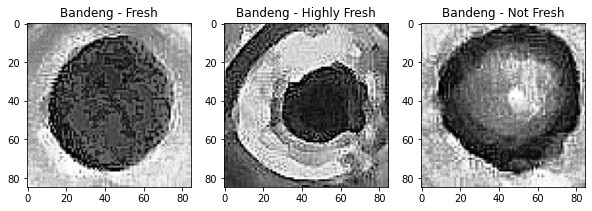

In [201]:
def ekualisasi_histogram(folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)  
    
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        output_label_path = os.path.join(output_folder, label)
        os.makedirs(output_label_path, exist_ok=True) 
        
        if os.path.isdir(label_path):
            
            for filename in os.listdir(label_path):
                file_path = os.path.join(label_path, filename)
                img = cv2.imread(file_path, 0)  

                equalized_img = cv2.equalizeHist(img)
          
                output_file_path = os.path.join(output_label_path, filename)
                cv2.imwrite(output_file_path, equalized_img)
        else:
            print(f"Label '{label}' tidak dalam direktori")

def menampilkan_hasil_equalisasi(folder):
    fig, update = plt.subplots(nrows=1, ncols=len(os.listdir(folder)), figsize=(10, 5))

    for i, label in enumerate(os.listdir(folder)):
        label_path = os.path.join(folder, label)

        if os.path.isdir(label_path):
            
            for j, filename in enumerate(os.listdir(label_path)):
                if j >= 1:
                    break
                file_path = os.path.join(label_path, filename)
                img = cv2.imread(file_path, 0)  
                
                update[i].imshow(img, cmap='gray')
                update[i].set_title(label)
        else:
            print(f"Label '{label}' tidak dalam direktori")

    plt.show()

folder_sharpening = r'C:\Users\ASUS\Downloads\TubesPCDVer3\TUBES KELOMPOK 11\CodePCDKelompok11\DatasetBandengSharpening'

folder_equalisasi = r'C:\Users\ASUS\Downloads\TubesPCDVer3\TUBES KELOMPOK 11\CodePCDKelompok11\DatasetBandengEqualisasiHistogram'

ekualisasi_histogram(folder_sharpening, folder_equalisasi)

menampilkan_hasil_equalisasi(folder_equalisasi)
